아이펠 수업에서 제공한 코드가 로컬에서는 작동하지 않음 
- pixellib 라이브러를 쓰려면, 과거 버전 파이썬 + 다른 라이브러리도 모두 다운그레이드 해야 함
- 환경 설정을 변경하는 것은 번거롭고, 실제로 내가 사용해서 프로젝트를 하려 해도 적합하지 않음
- 공부 목적이므로, 문제되는 pixellib 라이브러리의 영향을 제외하고 구현해보기로 결정

In [41]:
# 라이브러리 불러옴
import keras
from keras import ops
import keras_cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

In [42]:
# 수업 내용과 근접한 pascol voc 데이터셋으로 pretrained된 deeplabv3+ 모델을 불러옴
# input_w = 1024
# input_h = 1024

input_w = 512
input_h = 512

model = keras_cv.models.DeepLabV3Plus.from_preset(
    "deeplab_v3_plus_resnet50_pascalvoc",
    num_classes=21,
    input_shape=[input_w, input_h, 3], 
)

In [43]:
# 이미지 불러옴 
# img_path = './obj_imgs/pexels-esrannuur-129682465-14458837.jpg'  
img_path = './obj_imgs/pexels-ozanculha-23483907.jpg'
image = keras.utils.load_img(img_path)

# 이미지 크기 저장
original_size = image.size
print(f"Original size: {original_size}") # 원래 크기 출력

# 모델이 받는 w,h가 같은 크기여야 해서 이미지 크기를 resize해야 함 
resize = keras_cv.layers.Resizing(height=input_h, width=input_w)
image_resized = resize(image)

# 이미지를 NumPy 배열로 변환한 후, 배치 차원을 추가하여 모델 입력 형태로 바꿔주는 함수에 입력 
# axis=0이면 가장 앞에 차원이 추가되고, axis=-1이면 가장 뒤에 차원이 추가
image_array = keras.ops.expand_dims(np.array(image_resized), axis=0) 
print(image_array.shape)

Original size: (1672, 2508)
(1, 512, 512, 3)


In [44]:
# 이미지를 넣어 예측 실행 
predictions = model(image_array)

print(predictions.shape)
print(predictions[0][0][0]) # 마지막 축의 21개 클래스에 대한 확률값
print(predictions[0][189])

(1, 512, 512, 21)
tf.Tensor(
[9.9991989e-01 2.0811547e-07 3.2129403e-08 5.2322439e-06 3.8678657e-08
 3.4933743e-07 6.9936715e-07 4.0041291e-06 6.9014072e-06 1.1275884e-07
 4.8865240e-07 6.1498779e-09 9.0411795e-06 1.9578915e-06 9.2232646e-08
 2.0226566e-05 2.9434614e-07 5.2280143e-08 2.7935166e-05 7.5360838e-08
 2.3079965e-06], shape=(21,), dtype=float32)
tf.Tensor(
[[9.9949658e-01 8.6540624e-09 1.0429210e-06 ... 1.3179545e-06
  6.2686418e-08 2.7966628e-08]
 [9.9949658e-01 8.6540624e-09 1.0429210e-06 ... 1.3179545e-06
  6.2686418e-08 2.7966628e-08]
 [9.9946350e-01 7.7814377e-09 1.2125751e-06 ... 1.3495039e-06
  6.7390950e-08 2.6175513e-08]
 ...
 [9.9986303e-01 1.2633889e-07 1.5334118e-06 ... 1.7067980e-07
  4.8753709e-08 1.4157139e-07]
 [9.9987757e-01 1.2759432e-07 1.4190322e-06 ... 1.5109214e-07
  5.1393275e-08 1.4867010e-07]
 [9.9987757e-01 1.2759432e-07 1.4190322e-06 ... 1.5109214e-07
  5.1393275e-08 1.4867010e-07]], shape=(512, 21), dtype=float32)


In [45]:
# 가장 높은 확률을 가지는 클래스 인덱스 추출
# axis=-1은 텐서의 마지막 축을 따라 최대값의 인덱스를 찾는다는 의미
# 모델의 예측 결과가 (1, 512, 512, 21) 형태라면, 각 픽셀에 대해 21개의 클래스에 대한 확률값이 있음. 마지막 축의 21개 클래스에서 최대값을 가지는 index를 선택
# 최대값을 찾은 축을 제외하고 아래와 같이 반환됨 
class_indices = ops.argmax(predictions, axis=-1) 

print(class_indices.shape)
print(class_indices[0][199])

(1, 512, 512)
tf.Tensor(
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 1

In [46]:
# 마지막에 새로운 축을 추가하여 결과 텐서의 차원을 확장
# 후속 작업, 특히 시각화 및 모델 결과의 일관된 처리에 필요하기 때문에 이 작업을 수행
preds = ops.expand_dims(class_indices, axis=-1)

print(preds.shape)


(1, 512, 512, 1)


In [47]:
# 픽셀별 각 클래스에 대한 예측 값 확인하는 방법 

# 클래스 이름
class_names = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog',
    'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa',
    'train', 'tvmonitor'
]

# predictions의 형태는 (1, 512, 512, 21)입니다.
# 각 픽셀에 대해 21개의 클래스 확률 값을 가집니다.

# 각 클래스별 예측 확률 값 출력 (첫 번째 픽셀 예시)
first_pixel_predictions = predictions[0, 0, 0, :]
print("첫 번째 픽셀에 대한 클래스별 예측 확률 값:")
for class_idx, class_name in enumerate(class_names):
    print(f"{class_name}: {first_pixel_predictions[class_idx]:.4f}")

첫 번째 픽셀에 대한 클래스별 예측 확률 값:
background: 0.9999
aeroplane: 0.0000
bicycle: 0.0000
bird: 0.0000
boat: 0.0000
bottle: 0.0000
bus: 0.0000
car: 0.0000
cat: 0.0000
chair: 0.0000
cow: 0.0000
diningtable: 0.0000
dog: 0.0000
horse: 0.0000
motorbike: 0.0000
person: 0.0000
pottedplant: 0.0000
sheep: 0.0000
sofa: 0.0000
train: 0.0000
tvmonitor: 0.0000


In [48]:
from collections import Counter

# 예측된 클래스 값 배열 형태로 변환
preds_array = preds.numpy()
preds_class_values = preds_array[0, :, :, 0]

# 클래스별 개수 세기
class_counts = Counter(preds_class_values.flatten())

# 클래스 이름과 클래스별 개수 매칭하여 출력
for class_index, count in class_counts.items():
    class_name = class_names[class_index]
    print(f"Class: {class_name}, Count: {count}")

Class: background, Count: 195012
Class: person, Count: 67015
Class: dog, Count: 117


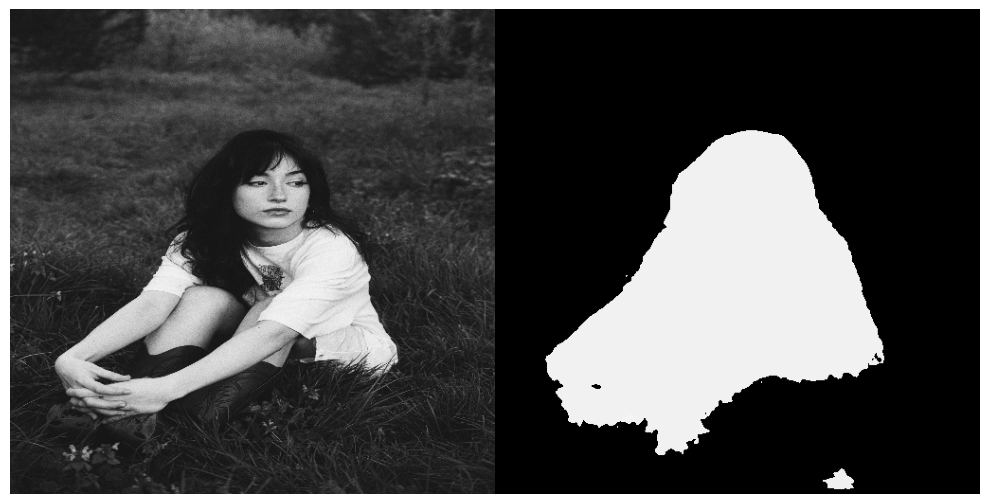

In [49]:
# 시각화
keras_cv.visualization.plot_segmentation_mask_gallery(
    image_array,
    value_range=(0, 255),
    num_classes=1,
    y_true=None,
    y_pred=preds,
    scale=10,
    rows=1,
    cols=1,
)

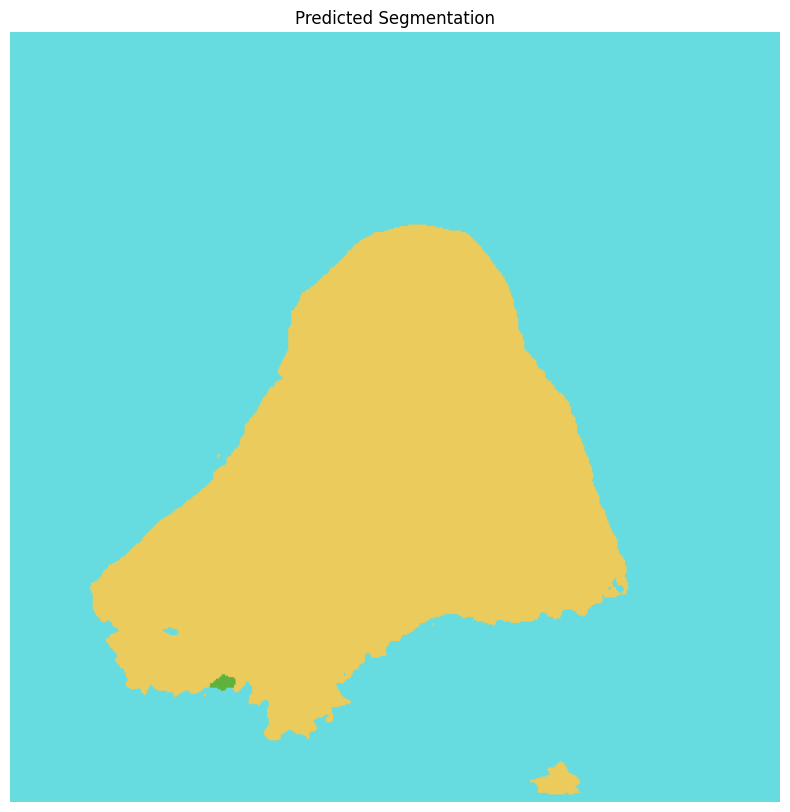

Class: background (ID: 0), Color: [102 220 225]
Class: dog (ID: 12), Color: [ 95 179  61]
Class: person (ID: 15), Color: [234 203  92]


In [50]:
# 예측한 class 별 색상 부여

# 임의의 색상 생성 함수 (이렇게 하는게 일반적이라고 함 )
def generate_random_colors(num_colors):
    np.random.seed(42)  # 재현성을 위해 시드 설정
    colors = np.random.randint(0, 255, size=(num_colors, 3), dtype=np.uint8)
    return colors

# 예측된 클래스 값 배열 형태로 변환
preds_array = preds.numpy()
preds_class_values = preds_array[0, :, :, 0]

# 클래스별 색상 맵 생성
unique_classes = np.unique(preds_class_values)
color_map = generate_random_colors(len(unique_classes))

# 클래스 인덱스를 색상으로 변환하는 함수
def label_to_color_image(label, color_map, unique_classes):
    label_colors = np.zeros((label.shape[0], label.shape[1], 3), dtype=np.uint8)
    for idx, class_id in enumerate(unique_classes):
        label_colors[label == class_id] = color_map[idx]
    return label_colors

# 클래스 값을 색상 이미지로 변환
preds_color = label_to_color_image(preds_class_values, color_map, unique_classes)

# 이미지 시각화
plt.figure(figsize=(10, 10))
plt.imshow(preds_color)
plt.title("Predicted Segmentation")
plt.axis('off')
plt.show()

# 클래스 이름과 색상 매핑 출력
for idx, class_id in enumerate(unique_classes):
    class_name = class_names[class_id]
    color = color_map[idx]
    print(f"Class: {class_name} (ID: {class_id}), Color: {color}")


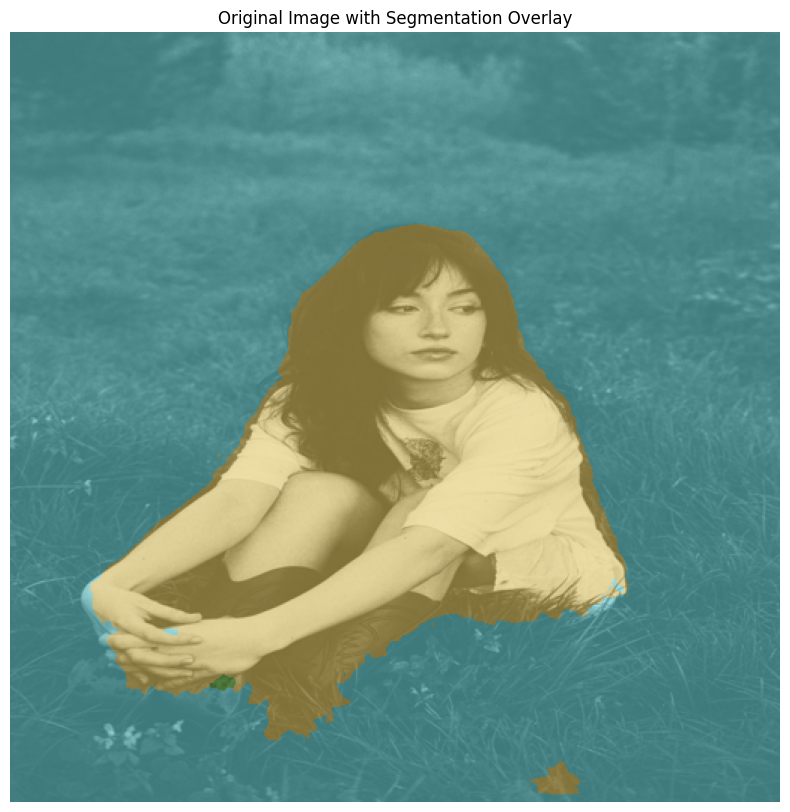

In [51]:
# 원본 이미지 위에 색상 마스크 오버레이
original_image_resized = np.array(image.resize((input_w, input_h), Image.BICUBIC))
overlay = Image.fromarray(preds_color).convert("RGBA")
base = Image.fromarray(original_image_resized).convert("RGBA")
blended = Image.blend(base, overlay, alpha=0.5)

# 결과 시각화
plt.figure(figsize=(10, 10))
plt.imshow(blended)
plt.title("Original Image with Segmentation Overlay")
plt.axis('off')
plt.show()

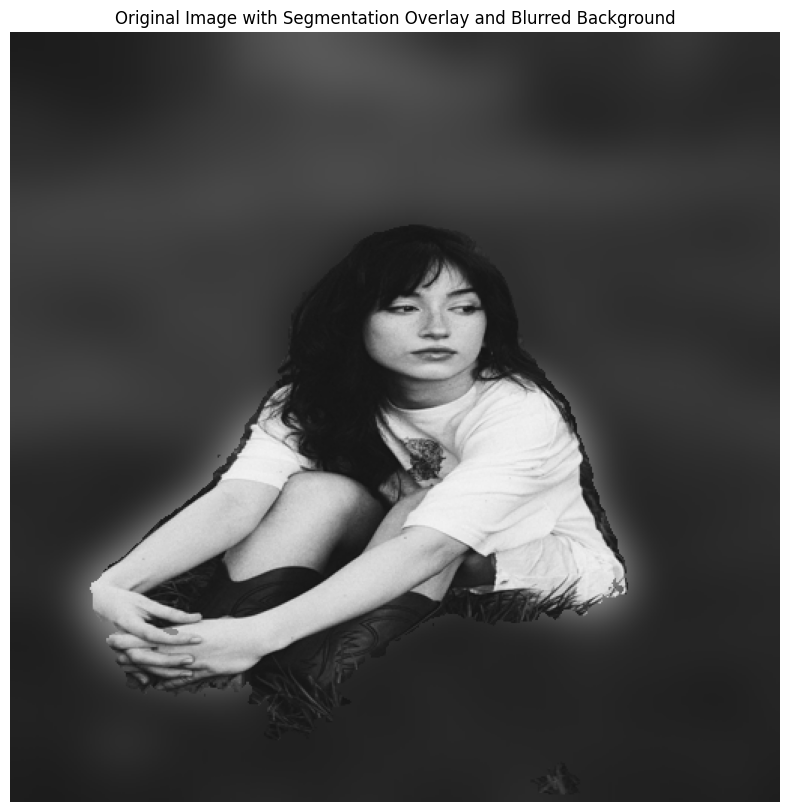

In [52]:
# 마스크 생성 (0 또는 255로 구성된 바이너리 마스크)
mask = (preds_class_values != 0).astype(np.uint8) * 255

# 원본 이미지를 배열 형태로 변환
original_image_resized = np.array(image.resize((512, 512)))

# 마스크 영역을 추출
mask_image = Image.fromarray(mask).convert("L")
mask_image_resized = mask_image.resize((512, 512))

# 원본 이미지와 블러 처리된 이미지 생성
base_image = Image.fromarray(original_image_resized)
blurred_image = base_image.filter(ImageFilter.GaussianBlur(radius=15))

# 블렌딩: 마스크가 있는 영역은 원본, 나머지는 블러
blended_image = Image.composite(base_image, blurred_image, mask_image_resized)

# 결과 시각화
plt.figure(figsize=(10, 10))
plt.imshow(blended_image)
plt.title("Original Image with Segmentation Overlay and Blurred Background")
plt.axis('off')
plt.show()

### 회고

환경 세팅을 하는게 상당히 시간이 많이 든다..

object가 많이 있는 이미지는 제대로 인식하지 못하는 것 같음 -> 해상도를 1024,1024로 높히면 인식율이 올라감, 하지만 모델 자체가 512,512로 학습한 버전이다보니 성능이 막 좋아지지는 않았음

도리어 object가 명확한 단순한 이미지는 해상도를 높히면 인식률이 나빠짐